# Unnamed struggling business

Our business has been struggling ever since the 2019 pandemic started. We have had to layoff 20 employees since the economic downturn. The purpose of this exercise is to explore where we can find ways to save cash and maximize revenue. We have 2 datasets to explore. One containing product types with the quantity, sales, discounts and returns. The other contains the sales by month over a period of 3 years.

In [73]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
from time import strptime
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.axis import Axis

In [2]:
sales_1 = pd.read_csv('business.retailsales.csv')
sales_2 = pd.read_csv('business.retailsales2.csv')

In [3]:
sales_1.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [4]:
sales_2.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


In [5]:
sales_1['Product Type'].value_counts()

Basket              551
Art & Sculpture     337
Jewelry             210
Kitchen             161
Home Decor          131
Christmas            73
Soapstone            67
Kids                 63
Accessories          39
Music                29
Fair Trade Gifts     28
Recycled Art         23
Furniture            16
Textiles             14
One-of-a-Kind        12
Skin Care            11
Easter                1
Gift Baskets          1
Name: Product Type, dtype: int64

From here we can see that the top 5 products constitute the bulk of our sales. There is something to be said of a retailer having a diverse range of items to sell, but perhaps we may want to consider dropping products that don't sell well enough to justify buying them from manufacturers. 

<AxesSubplot:>

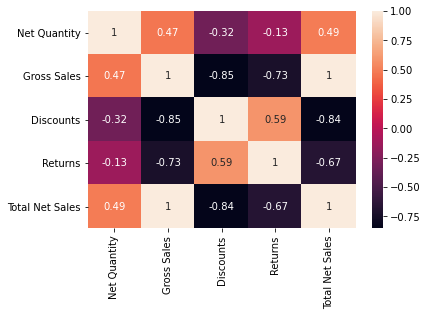

In [6]:
sns.heatmap(sales_1.corr(), annot=True)

### Since returns have a negative correlation with total net sales, let's see which products are being returned most often.

Product types sorted by highest returns

In [8]:
grouped_products = sales_1.groupby(sales_1['Product Type']).sum()
grouped_products[grouped_products['Returns'] < 0].sort_values(by='Returns')

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
Product Type,,,,,
Basket,1461,143815.50,-4584.42,-4439.69,134791.39
Art & Sculpture,1427,90316.60,-2955.82,-2879.93,84480.85
Christmas,575,15476.00,-345.19,-670.00,14460.81
Jewelry,991,31048.00,-965.85,-509.20,29572.95
Home Decor,404,27114.55,-991.21,-423.35,25699.99
Kitchen,809,16096.00,-431.11,-328.07,15336.82
Music,98,2643.50,-82.19,-142.41,2418.90
Textiles,43,1889.00,-112.90,-97.00,1679.10
Soapstone,199,4795.50,-96.91,-69.50,4629.09


We can see that product types with the highest loss from returns is roughly in line with the net quantity of sales, which isn't too surprising. But let's see how this looks when we look the percentage loss from returns.

In [13]:
grouped_products['Percentage loss from returns'] = np.abs(grouped_products['Returns'] / grouped_products['Gross Sales']) * 100
grouped_products['Percentage loss from discounts'] = np.abs(grouped_products['Discounts'] / grouped_products['Gross Sales']) * 100

grouped_products.sort_values(by='Percentage loss from returns', ascending=False)

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales,Percentage loss from returns,Percentage loss from discounts
Product Type,,,,,,,
Music,98,2643.50,-82.19,-142.41,2418.90,5.387176,3.109136
Textiles,43,1889.00,-112.90,-97.00,1679.10,5.134992,5.976707
Christmas,575,15476.00,-345.19,-670.00,14460.81,4.329284,2.230486
Art & Sculpture,1427,90316.60,-2955.82,-2879.93,84480.85,3.188705,3.272732
Basket,1461,143815.50,-4584.42,-4439.69,134791.39,3.087073,3.187709
Kitchen,809,16096.00,-431.11,-328.07,15336.82,2.038208,2.678367
Jewelry,991,31048.00,-965.85,-509.20,29572.95,1.640041,3.110828
Home Decor,404,27114.55,-991.21,-423.35,25699.99,1.561339,3.655639
Soapstone,199,4795.50,-96.91,-69.50,4629.09,1.449275,2.020853


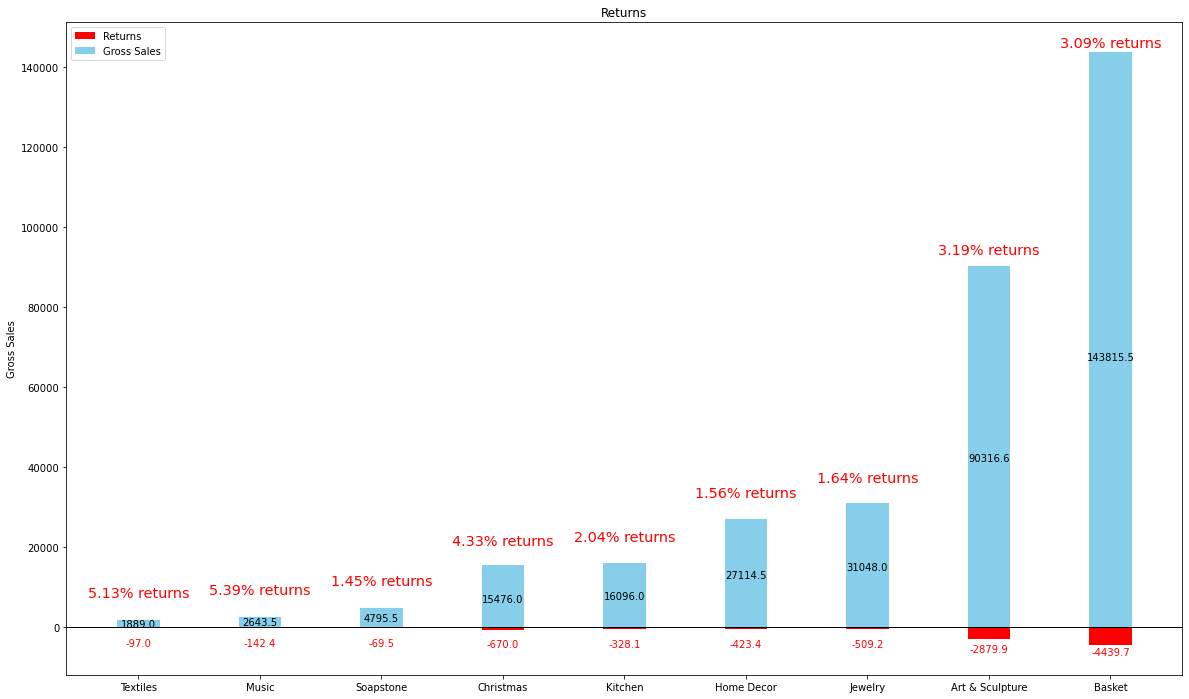

In [152]:
gp_returns = grouped_products[grouped_products['Returns'] < 0]
gp_returns = gp_returns.sort_values('Gross Sales')
gpr_index = gp_returns.index
returns = gp_returns['Returns']
gross_sales = gp_returns['Gross Sales']

x = np.arange(9)
plt.figure(figsize=[20, 12])
plt.xticks(x, gpr_index)
plt.bar(x, returns, width=0.35, label='Returns', color='red')
plt.bar(x, gross_sales, width=0.35, label='Gross Sales', color='skyblue')

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, returns/2, returns):
    plt.text(xpos, ypos-4000, "%.1f"%yval, ha="center", va="center", color='red')
for xpos, ypos, yval in zip(x, returns+gross_sales/2, gross_sales):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, gross_sales+returns, returns/gross_sales*100):
    plt.text(xpos, ypos+5000, str(round(np.abs(yval), 2)) + '% returns', ha="center", va="bottom", color='red', size='x-large')

    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.ylabel('Gross Sales')
plt.title('Returns')
plt.legend()

Here we can see that textiles and music had the highest return rate. However, they contribute much less to our overall losses due to the fact they make up a small percentage of our overall sales. Thus, we might want to examine why Art & Sculpture and Basket also have a relatively high return rate. Reducing our return rate on these will have a much greater impact on our total losses from return. We might also want to look at our return policy with textiles, music and Christmas products, as they have a very high loss from returns. 

### Let's see which product types are impacted most by discounts

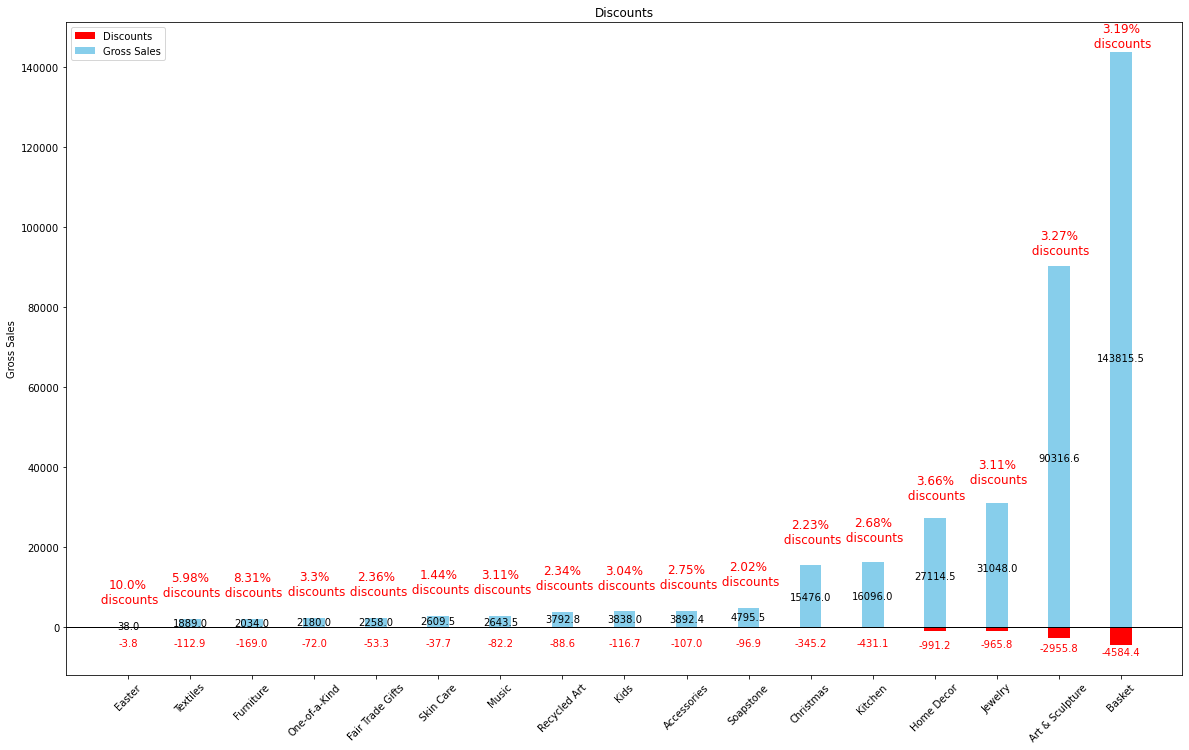

In [150]:
gp_returns = grouped_products[grouped_products['Discounts'] < 0]
gp_returns = gp_returns.sort_values('Gross Sales')
gpr_index = gp_returns.index
discounts = gp_returns['Discounts']
gross_sales = gp_returns['Gross Sales']

x = np.arange(len(gp_returns))
plt.figure(figsize=[20, 12])
plt.xticks(x, gpr_index, rotation=45)
plt.bar(x, discounts, width=0.35, label='Discounts', color='red')
plt.bar(x, gross_sales, width=0.35, label='Gross Sales', color='skyblue')

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, discounts/2, discounts):
    plt.text(xpos, ypos-4000, "%.1f"%yval, ha="center", va="center", color='red')
for xpos, ypos, yval in zip(x, discounts+gross_sales/2, gross_sales):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, gross_sales+discounts, discounts/gross_sales*100):
    plt.text(xpos, ypos+5000, str(round(np.abs(yval), 2)) + '%\n discounts', ha="center", va="bottom", color='red', size='large')

    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.ylabel('Gross Sales')
plt.title('Discounts')
plt.legend()

Once again we see Art & Sculpture and Basket having the highest losses from discounts and among the highest as a percentage of loss from discounts. With better data about when discounts went into affect or what the discounts were for we could better determine the effectiveness of the discounts. 

# Let's check out the correlation between discounts and sales

<AxesSubplot:>

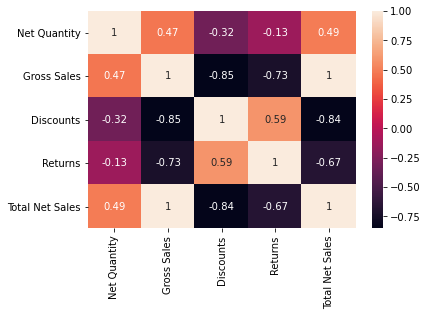

In [22]:
sns.heatmap(sales_1.corr(), annot=True)


It seems there is an inverse relationship between discounts and gross sales. However, it seems unlikely that having discounts actually leads to decreased gross sales. More likely is that discounts are being offered to items that are not selling well. Either way, we may want to look into which items are being discounted and whether or not this is helping the bottom line. 

# Let's look at monthly sales rates

In [52]:
sales_2.head(12)

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


In [59]:
sales_2['Day'] = 1
sales_2['Month'] = pd.to_datetime(sales_2.Month, format='%B').dt.month
sales_2['Date'] = pd.to_datetime(sales_2[['Year', 'Month', 'Day']])
sales_2['Date'] = sales_2['Date'].dt.strftime('%Y-%m')
sales_2.drop(columns=['Month', 'Year', 'Day'])
sales_2 = sales_2[['Date', 'Total Orders', 'Gross Sales', 'Discounts', 'Returns', 'Net Sales', 'Shipping', 'Total Sales']]
sales_2.head()

,Date,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,2017-01,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,2017-02,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,2017-03,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,2017-04,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,2017-05,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


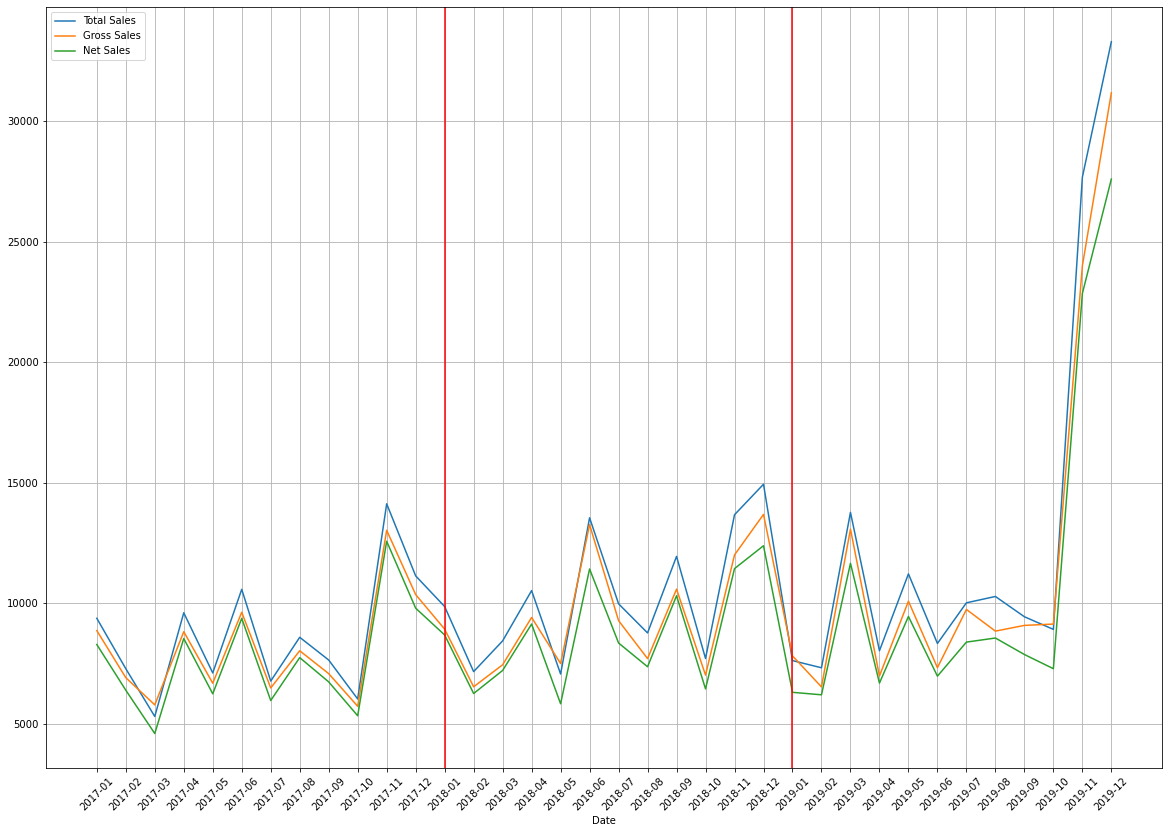

In [140]:
sales_2.plot(x='Date', y=['Total Sales', 'Gross Sales', 'Net Sales'], rot=45,figsize=(20,14))
plt.xticks(range(len(sales_2)),sales_2['Date'])
plt.axvline(x=12, color='r')
plt.axvline(x=24, color='r')
plt.grid(True)
plt.show()

We can see here the seasonality of sales, which maxes out just before Christmas. No surprise there. With this information we can more efficiently re-stock our inventory based on the seasonal demand. We may also want to alter hours of operation and staffing to accomidate to this seasonality. 

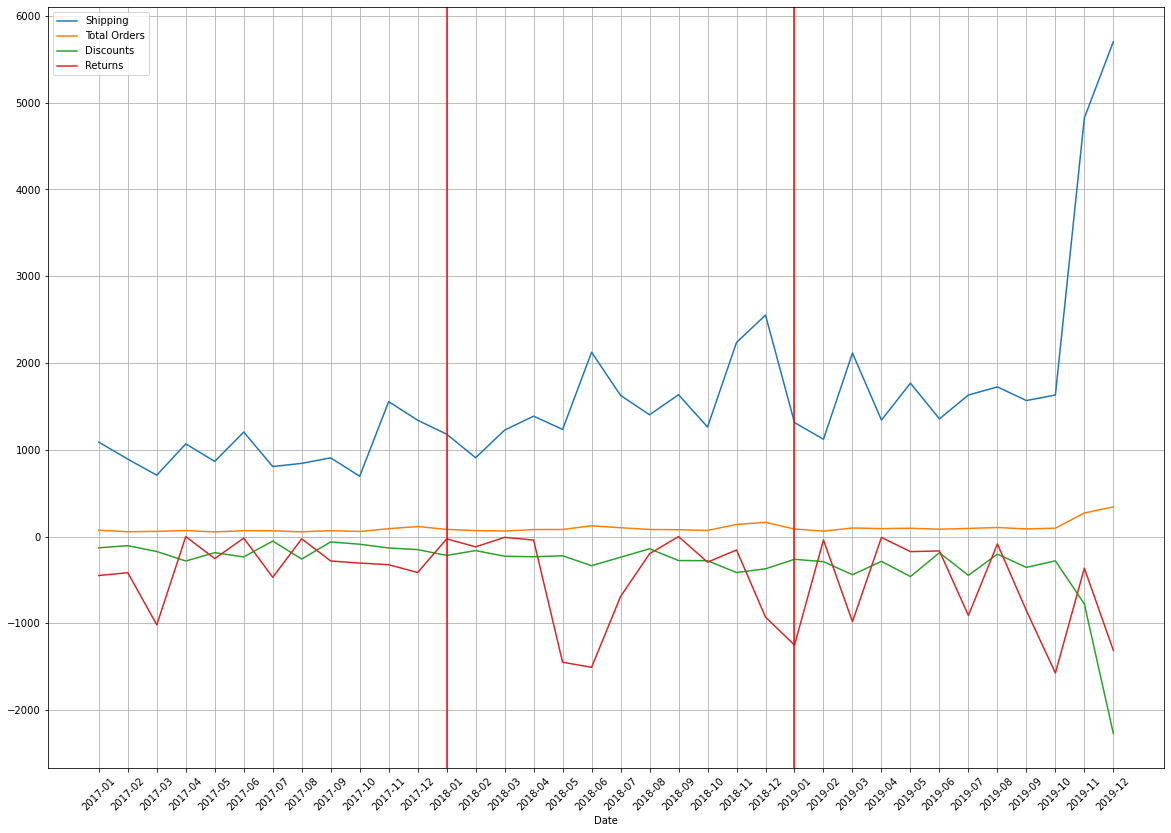

In [141]:
sales_2.plot(x='Date', y=['Shipping', 'Total Orders', 'Discounts', 'Returns'], rot=45,figsize=(20,14))
plt.xticks(range(len(sales_2)),sales_2['Date'])
plt.axvline(x=12, color='r')
plt.axvline(x=24, color='r')
plt.grid(True)
plt.show()

It appears that our losses from returns and discounts have increased since 2017. We might want to explore why this is. Is it from changes to our return policy? Did we change manufacturers? These are all things to consider. 

## Conclusion

The recommedations are as follows:

Consider dropping products that don't sell well enough to justify buying them from manufacturers.

Considering textiles, Christmas and music have such a high return rate and relatively low sales, we might want to consider if it is worth selling these items or if the return policy needs adjusting.

Art & Sculpture and Basket product types also had a relatively high return rate and considering these are our top selling products, we might want to explore the reasons for this (i.e. return policy, manufacturer defects, etc.)

We need to collect more data to determine the effectiveness of discounts, because once again, our two top sellers (Art & Sculpture and Basket) are most effected by this. 

With our time series line plots we can better determine how to more efficiently stock our inventory to meet seasonal demand. In these times of covid, we might also want our hours of operation and staffing to better reflect seasonal demand.

Collect more data as to why our losses from returns and discounts have increased since 2007. Did our return policy change? Did we change manufacturers? All things to consider


